#Optimization of Evacuation Routes in Philippine Science High School – Main Campus (PSHS-MC) Using Cellular Automata Crowd Modeling

RuntimeError: Requested MovieWriter (ffmpeg) not available

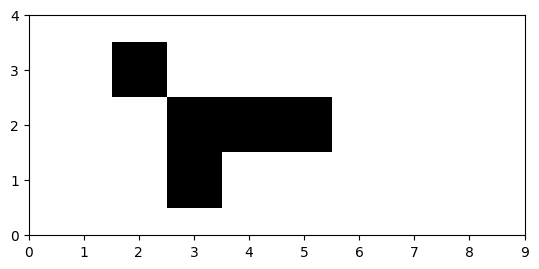

In [9]:
"""2D Cellular Automaton"""

import numpy as np
import cellpylib as cpl
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.collections as mcoll

frames=250

#init setup
cellularAutomaton = cpl.init_simple2d(4,9)

cellularAutomaton[:, [1,2], [3,3]] = 1
cellularAutomaton[:, [2,2], [4,5]] = 1
cellularAutomaton[:, [3], [2]] = 1 # can be changed

#cellularAutomaton = cpl.init_random2d(rows:60, cols:60)

cellularAutomaton = cpl.evolve2d(cellularAutomaton, timesteps=frames, neighbourhood='Moore', # timestamps must be = frames in line with ani
                                 apply_rule=cpl.game_of_life_rule,
                                 memoize = 'recursive')

# cellularAutomaton = cpl.evolve2d(cellularAutomaton, timesteps=frames, neighbourhood='Moore', # timestamps must be = frames in line with ani
#                                  apply_rule = lambda n,c,t: cpl.totalistic_rule(n,k=2,rule=126),
#                                  memorize = 'recursive')

#cpl.plot2d(cellularAutomaton)

fig, ax = plt.subplots()
ax.set_xlim((0,9))
ax.set_ylim((0,4))

img = ax.imshow(cellularAutomaton[0], interpolation='nearest', cmap='Greys')

def init():
    img.set_data(cellularAutomaton[0])
    return(img,)

def ani(i):
    img.set_data(cellularAutomaton[i])
    return (img,)

anim = anime.FuncAnimation(fig, ani, init_func=init, frames = frames, interval = 30, blit = True, repeat = False)

#esoteric display code
from IPython.display import HTML
HTML(anim.to_html5_video())
plt.show()

In [ ]:
 """1D Cellular Automaton"""

class CustomRule(cpl.BaseRule):
  def __call__(self,n,c,t):
    #return n[1] + 1
    return 1 if n[1] != n[0] else 0

rule = CustomRule()

cellular_automata = cpl.init_simple(200)

cellular_automata = cpl.evolve(cellular_automata, timesteps=60, apply_rule = CustomRule())

cpl.plot(cellular_automata)

fig, ax = plt.subplots()
mat = ax.matshow(cellular_automata, cmap='binary')
plt.axis('off')
